In [48]:
from selenium import webdriver
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time
import urllib.request

In [49]:
driver = webdriver.Chrome('chromedriver.exe') # 여기에 크롬드라이브 경로를 입력
driver.get("https://www.google.com/imghp?hl=ko&ogbl")
elem = driver.find_element_by_name("q") # 웹 페이지에서 검색창을 찾기. 구글에서 검색창의 name은 "q"이다.
elem.send_keys("damaged container") # 검색 키워드 입력
elem.send_keys(Keys.RETURN) # Enter

In [50]:
# 검색 후 모든 검색결과가 나올 수 있도록 스크롤을 끝까지 내리고 시작하기

SCROLL_PAUSE_TIME = 2
 
last_height = driver.execute_script("return document.body.scrollHeight")
 
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
 
    time.sleep(SCROLL_PAUSE_TIME)
 
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        try:
            driver.find_element_by_css_selector(".mye4qd").click()
        except:
            break
    last_height = new_height

In [51]:
import requests
from bs4 import BeautifulSoup

soup = BeautifulSoup(driver.page_source, "lxml")

<html dir="ltr" itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><script async="" nonce="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.7RphtNcGHDQ.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo_-zmYhp_Ir7_CCxM3l-AckMvaI9A/cb=gapi.loaded_0"></script><base href="https://www.google.com/"/><meta content="origin" name="referrer"/><script data-id="_gd" nonce="">window.WIZ_global_data = {"AY2V6d":true,"DpimGf":false,"EP1ykd":["/_/*","/buzz/c","/buzz/c/*","/cameos","/cameos/*","/cbk","/cbk/*","/coronavirus-map","/coronavirus-map/*","/covid19-map","/covid19-map/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*","/finance","/finance/*","/healthinsurance/immersive","/healthinsurance/immersive/*","/history","/history/*","/ig/c","/ig/c/*","/local/business","/local/business/*","/local/cars/tools","/local/cars/tools/*","/local/follow","/local/follow/*","/local/imagery/report","/local/imagery/report/*",
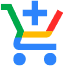
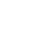
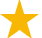
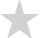
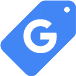
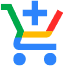
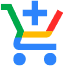
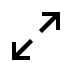
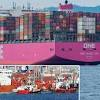
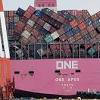
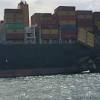
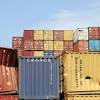
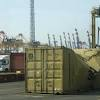
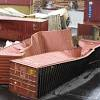
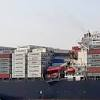
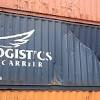
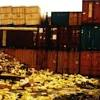
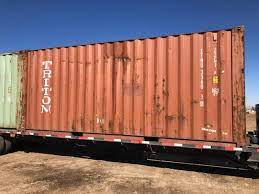
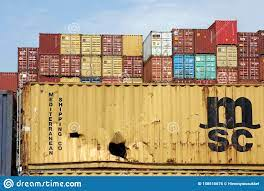
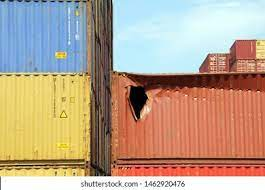
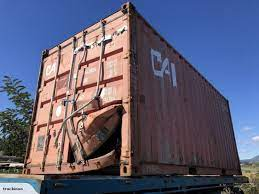
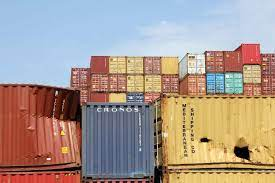
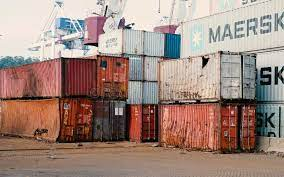
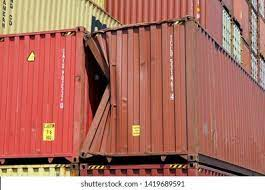
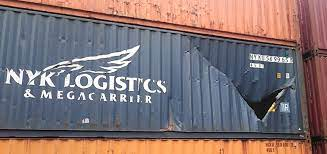
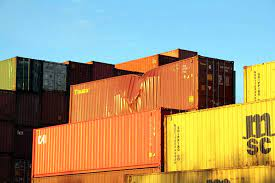
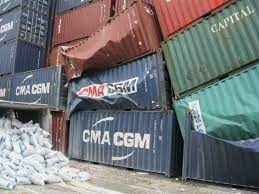
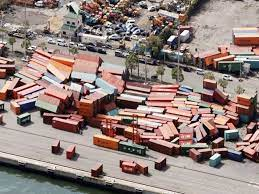
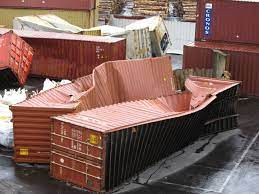
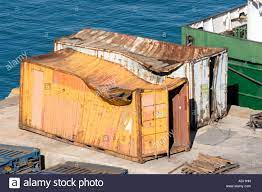
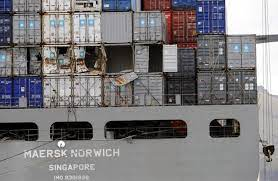
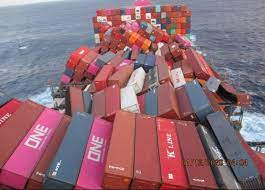
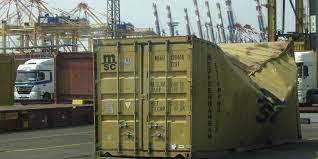
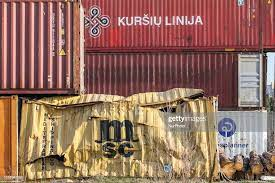
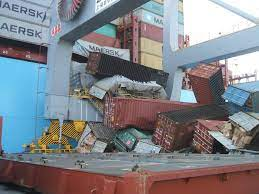
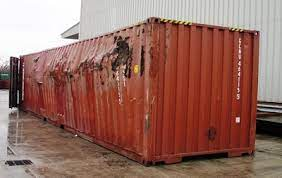
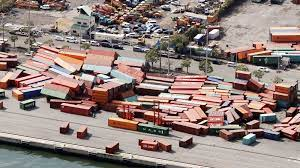

In [52]:
soup

In [53]:
images = soup.find_all("img", attrs={"class":"rg_i Q4LuWd"})  
len(images)

798

In [57]:
image_url = images[20]["src"]
image_res = requests.get(image_url)
image_res.raise_for_status()


In [58]:
with open("container1.jpg", "wb") as f:
        f.write(image_res.content)

In [59]:
count=1
for image in images:
    #print(image["src"])
    try:
        image_url = image["src"]
        image_res = requests.get(image_url)
        image_res.raise_for_status()
    except:
        continue
    with open("container_{}.jpg".format(count), "wb") as f:
        f.write(image_res.content)
    count+=1
